In [1]:
import os
import random

# ─── CONFIG ────────────────────────────────────────────────────────────────────
src_dir = "holdout_data"      # your folder
keep_fraction = 0.05          # fraction of positives to keep
random_seed = 42              # for reproducibility
# ────────────────────────────────────────────────────────────────────────────────

random.seed(random_seed)

# 1. List all .dat files and extract unique stems
all_files = os.listdir(src_dir)
dat_files = [f for f in all_files if f.endswith(".dat")]
stems = {os.path.splitext(f)[0] for f in dat_files}

# 2. Split into negative vs positive stems
neg_stems = [s for s in stems if s.startswith("00")]
pos_stems = [s for s in stems if not s.startswith("00")]

# 3. Sample 5% of positives
n_keep = max(1, int(len(pos_stems) * keep_fraction))
keep_pos = set(random.sample(pos_stems, n_keep))

# 4. Build the final keep‐set
keep = set(neg_stems) | keep_pos

# 5. Delete all other positive records
for stem in stems:
    if stem not in keep:
        for ext in (".dat", ".hea"):
            path = os.path.join(src_dir, stem + ext)
            if os.path.exists(path):
                os.remove(path)
        print(f"Removed {stem} (both .dat/.hea)")

print("Done. Kept", len(neg_stems), "negatives +", len(keep_pos), "positives.")


Removed 111288 (both .dat/.hea)
Removed 88506 (both .dat/.hea)
Removed 101842 (both .dat/.hea)
Removed 99398 (both .dat/.hea)
Removed 28877 (both .dat/.hea)
Removed 117986 (both .dat/.hea)
Removed 181736 (both .dat/.hea)
Removed 149836 (both .dat/.hea)
Removed 56422 (both .dat/.hea)
Removed 185588 (both .dat/.hea)
Removed 24756 (both .dat/.hea)
Removed 177005 (both .dat/.hea)
Removed 175346 (both .dat/.hea)
Removed 201711 (both .dat/.hea)
Removed 146494 (both .dat/.hea)
Removed 162030 (both .dat/.hea)
Removed 135830 (both .dat/.hea)
Removed 134793 (both .dat/.hea)
Removed 60948 (both .dat/.hea)
Removed 204537 (both .dat/.hea)
Removed 121673 (both .dat/.hea)
Removed 169272 (both .dat/.hea)
Removed 134634 (both .dat/.hea)
Removed 43580 (both .dat/.hea)
Removed 199873 (both .dat/.hea)
Removed 50222 (both .dat/.hea)
Removed 24028 (both .dat/.hea)
Removed 179724 (both .dat/.hea)
Removed 199009 (both .dat/.hea)
Removed 184107 (both .dat/.hea)
Removed 164072 (both .dat/.hea)
Removed 94527 (bo


Confusion Matrix:
              Pred False  Pred True
Actual False        6440        100
Actual True            9         33


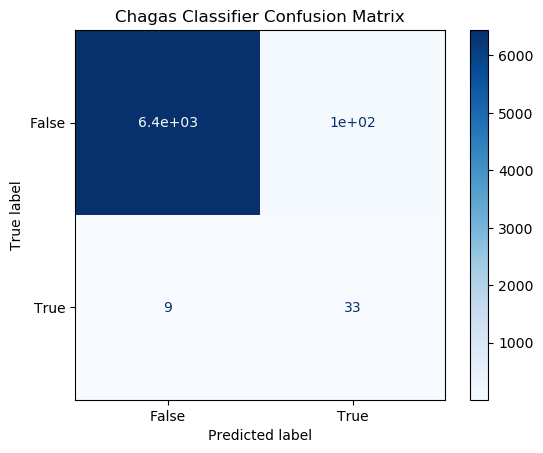

In [3]:
import os, re, numpy as np, pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ─── CONFIG ────────────────────────────────────────────────────────────────────
pred_folder = "holdout_outputs"                      # .txt predictions
data_folder = "/home/physionet/project/data/test"    # .hea ground truth
threshold   = 0.5                                    # probability cutoff
# ───────────────────────────────────────────────────────────────────────────────

# Disable scientific notation everywhere
np.set_printoptions(suppress=True)
pd.set_option("display.float_format", lambda x: f"{x:.0f}")

pat_pred_prob  = re.compile(r"Chagas probability:\s*([0-9.eE+-]+)")
pat_true_label = re.compile(r"# Chagas label:\s*(True|False)")

# 1) Load predictions
preds = {}
for fn in os.listdir(pred_folder):
    if fn.endswith(".txt"):
        stem = os.path.splitext(fn)[0]
        prob = float(pat_pred_prob.search(open(os.path.join(pred_folder, fn)).read()).group(1))
        preds[stem] = (prob >= threshold)

# 2) Load true labels
trues = {}
for fn in os.listdir(data_folder):
    if fn.endswith(".hea"):
        stem = os.path.splitext(fn)[0]
        label = pat_true_label.search(open(os.path.join(data_folder, fn)).read()).group(1)
        trues[stem] = (label == "True")

# 3) Build DataFrame of matched records
df = pd.DataFrame(
    {"stem": s, "true": trues[s], "pred": preds[s]}
    for s in trues if s in preds
)

# 4) Confusion matrix
cm = confusion_matrix(df["true"], df["pred"], labels=[False, True])
cm_df = pd.DataFrame(cm,
                     index=["Actual False", "Actual True"],
                     columns=["Pred False", "Pred True"])

print("\nConfusion Matrix:")
print(cm_df)

# Optional: plot
ConfusionMatrixDisplay(cm, display_labels=["False", "True"]).plot(cmap=plt.cm.Blues)
plt.title("Chagas Classifier Confusion Matrix")
plt.show()


In [4]:
!pip uninstall numpy -y

Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Successfully uninstalled numpy-1.24.3


In [5]:
!pip install numpy==1.23.5

     |████████████████████████████████| 17.1 MB 2.2 MB/s eta 0:00:01


In [5]:
import glob
import os
target_directory = "/home/physionet/project/data/ptbxlFalse"

files = glob.glob(os.path.join(target_directory, "*.hea"))

print (f"Found {len(files)} .hea files in {target_directory}.")

Found 21799 .hea files in /home/physionet/project/data/ptbxlFalse.
